In [14]:
# Loading data
import pandas as pd
excel_file=r"C:/Users/user/Music/Regression case studies/Regression1.xlsx"
df=pd.read_excel(excel_file)
df

,Month,Advertising Expenditure (X),Sales (Y)
0,1,49,14
1,2,40,9
2,3,50,15
3,4,46,13
4,5,44,12
5,6,52,15
6,7,54,15
7,8,58,16
8,9,56,15
9,10,60,18


In [6]:
# Creating function to print info on the dataset
def inspect_data(df):
    print('Data Shape')
    print('\n')
    print(df.shape)
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    
inspect_data(df)

Data Shape


(30, 3)


Missing Values: 
Month                          0
Advertising Expenditure (X)    0
Sales (Y)                      0
dtype: int64


Data Types: 
Month                          int64
Advertising Expenditure (X)    int64
Sales (Y)                      int64
dtype: object


In [12]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Advertising Expenditure (X)    0
Sales (Y)                      0
dtype: int64


In [13]:
duplicates = df.duplicated()
print("\nDuplicated rows in the dataframe:")
print(df[duplicates])


Duplicated rows in the dataframe:
    Advertising Expenditure (X)  Sales (Y)
10                           49         14
11                           40          9
12                           50         15
13                           46         13
14                           44         12
15                           52         15
16                           54         15
17                           58         16
18                           56         15
19                           60         18
20                           49         14
21                           40          9
22                           50         15
23                           46         13
25                           52         15
26                           54         15
27                           58         16


In [35]:
# Summary statistics
summary_stats = df.describe()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          Month  Advertising Expenditure (X)  Sales (Y)
count  5.000000                     5.000000   5.000000
mean   3.000000                    45.800000  12.600000
std    1.581139                     4.024922   2.302173
min    1.000000                    40.000000   9.000000
25%    2.000000                    44.000000  12.000000
50%    3.000000                    46.000000  13.000000
75%    4.000000                    49.000000  14.000000
max    5.000000                    50.000000  15.000000


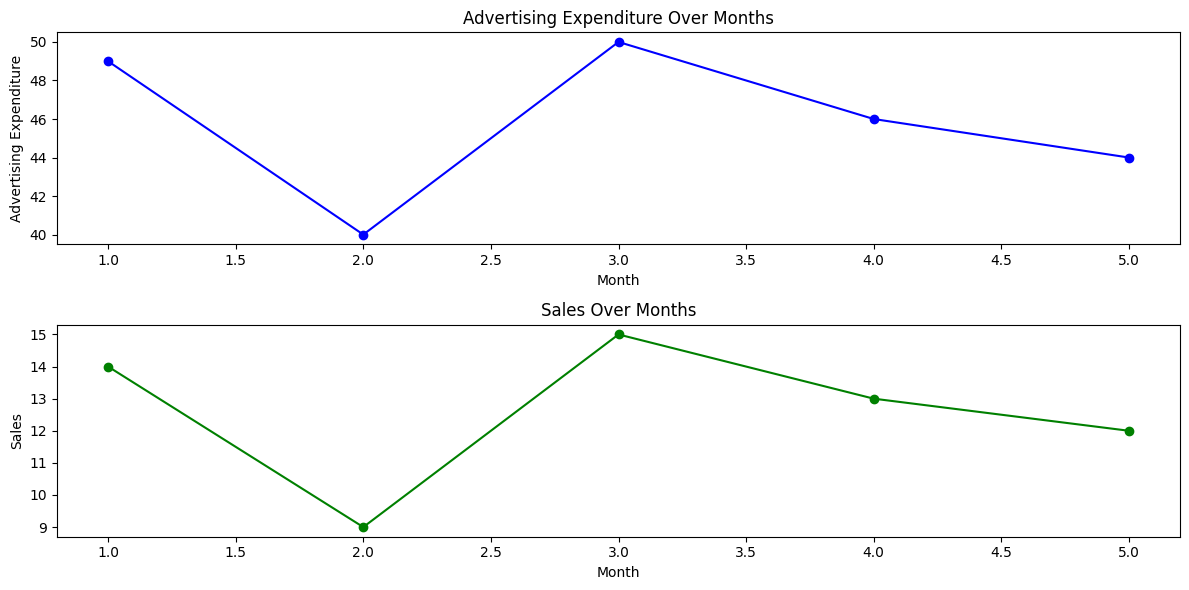

In [36]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))

# Advertising Expenditure
plt.subplot(2, 1, 1)
plt.plot(df['Month'], df['Advertising Expenditure (X)'], marker='o', color='blue')
plt.title('Advertising Expenditure Over Months')
plt.xlabel('Month')
plt.ylabel('Advertising Expenditure')

# Sales
plt.subplot(2, 1, 2)
plt.plot(df['Month'], df['Sales (Y)'], marker='o', color='green')
plt.title('Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


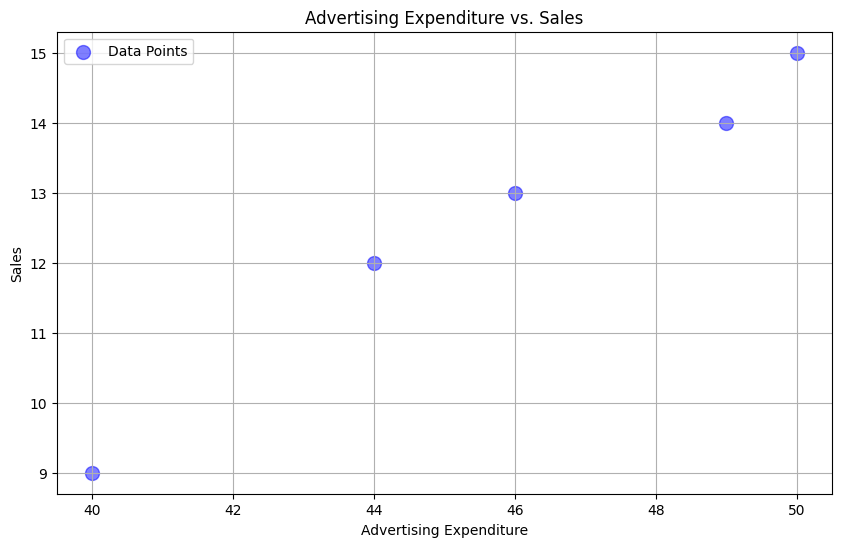

In [37]:
import matplotlib.pyplot as plt

# Bubble Plot (Scatter plot with varying bubble size)
plt.figure(figsize=(10, 6))

plt.scatter(df['Advertising Expenditure (X)'], df['Sales (Y)'], s=100, alpha=0.5, c='blue', label='Data Points')

plt.title('Advertising Expenditure vs. Sales')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression Model
from sklearn.model_selection import train_test_split # Importing Model Selection to split dataset into training and testing set
from sklearn.metrics import r2_score # Importing R² score

In [18]:
X = df.drop('Sales (Y)', axis = 1)# Selecting independent variables by removing 'median_house_value' column from dataframe
X.head()

,Month,Advertising Expenditure (X)
0,1,49
1,2,40
2,3,50
3,4,46
4,5,44


In [19]:
y = df['Advertising Expenditure (X)'] # Selecting dependent variable from the dataframe
y

0     49
1     40
2     50
3     46
4     44
5     52
6     54
7     58
8     56
9     60
10    49
11    40
12    50
13    46
14    44
15    52
16    54
17    58
18    56
19    60
20    49
21    40
22    50
23    46
24    44
25    52
26    54
27    58
28    56
29    63
Name: Advertising Expenditure (X), dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Splitting X and y instances for training and testing sets
                                                   test_size = 0.3) # 30% of data will be used for testing the model

In [21]:
lr = LinearRegression() # Initializing the model
lr.fit(X_train, y_train) # Fitting the model to the training data

y_pred = lr.predict(X_test) # Predicting prices on the testing set
score = r2_score(y_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values

print(f'\nModel R² Score: {score:.3f}') # Printing R² score


Model R² Score: 1.000


In [27]:
# Printing regression coefficients and intercept
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients: [-2.78336781e-17  1.00000000e+00]
Intercept: -3.552713678800501e-14
